<a href="https://colab.research.google.com/github/eduardopadilla3/Unit2_BW_code/blob/master/Unit2project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime, timedelta, date, time
from time import strftime
import os

col_result = 'HDA_RESULT'

curr_path = os.getcwd()
csv_name = 'str_asian_025.csv'
output_file = '%s\\data\\%s' % (curr_path,csv_name)
error_file = '%s\\error.txt' % (curr_path)
if os.path.exists(error_file):
    os.remove(error_file)
    

current_match_date = datetime.now()
current_time = datetime.now().time()
if current_time >= time(0,0) and current_time <= time(11, 30):
    previous_day = current_match_date - timedelta(days=1)
    current_match_date = previous_day
db_match_date = current_match_date.strftime("%Y%m%d")
current_match_date = current_match_date.strftime("%Y-%m-%d 11:30:00")


print('Execution time: %s' % strftime('%Y-%m-%d %H:%M:%S'))
print('Match date: %s' % current_match_date)

Execution time: 2020-10-08 01:03:41
Match date: 2020-10-07 11:30:00


In [2]:
import cx_Oracle
import codecs

db_user = 'JW'
db_password = '901203'
db_dsn = 'HOME-PC/XE'
db_encoding = 'UTF-8'

# Database connection
connection = None
try:
    connection = cx_Oracle.connect(
        db_user,
        db_password,
        db_dsn,
        encoding=db_encoding)

    c = connection.cursor()
    
    if os.path.exists(output_file):
        os.remove(output_file)
    
    file = codecs.open(output_file, "a+", "utf-8")

    # write file header
    file.write('MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,HDA_RESULT,ML_TYPE,STR_OU_MODE_HDC,STR_OU_AVG_HI,STR_OU_AVG_LO,STR_OU_BET365_HDC,STR_OU_BET365_HI,STR_OU_BET365_LO,STR_OU_YINGWO_HDC,STR_OU_YINGWO_HI,STR_OU_YINGWO_LO,STR_OU_PINNACLE_HDC,STR_OU_PINNACLE_HI,STR_OU_PINNACLE_LO,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,STR_A_MODE_HDC,STR_A_AVG_H,STR_A_AVG_A,STR_A_BET365_HDC,STR_A_BET365_H,STR_A_BET365_A,STR_A_YINGWO_HDC,STR_A_YINGWO_H,STR_A_YINGWO_A,STR_A_PINNACLE_HDC,STR_A_PINNACLE_H,STR_A_PINNACLE_A,STR_A_MACAU_HDC,STR_A_MACAU_H,STR_A_MACAU_A,STR_A_HKJC_HDC,STR_A_HKJC_H,STR_A_HKJC_A,STR_A_BET365_H_DIFF,STR_A_BET365_A_DIFF,STR_A_YINGWO_H_DIFF,STR_A_YINGWO_A_DIFF,STR_A_PINNACLE_H_DIFF,STR_A_PINNACLE_A_DIFF,STR_A_MACAU_H_DIFF,STR_A_MACAU_A_DIFF,STR_A_HKJC_H_DIFF,STR_A_HKJC_A_DIFF,STR_HDA_AVG_H,STR_HDA_AVG_D,STR_HDA_AVG_A,STR_HDA_BET365_H,STR_HDA_BET365_D,STR_HDA_BET365_A,STR_HDA_YINGWO_H,STR_HDA_YINGWO_D,STR_HDA_YINGWO_A,STR_HDA_PINNACLE_H,STR_HDA_PINNACLE_D,STR_HDA_PINNACLE_A,STR_HDA_MACAU_H,STR_HDA_MACAU_D,STR_HDA_MACAU_A,STR_HDA_HKJC_H,STR_HDA_HKJC_D,STR_HDA_HKJC_A,STR_HDA_BET365_H_DIFF,STR_HDA_BET365_D_DIFF,STR_HDA_BET365_A_DIFF,STR_HDA_YINGWO_H_DIFF,STR_HDA_YINGWO_D_DIFF,STR_HDA_YINGWO_A_DIFF,STR_HDA_PINNACLE_H_DIFF,STR_HDA_PINNACLE_D_DIFF,STR_HDA_PINNACLE_A_DIFF,STR_HDA_MACAU_H_DIFF,STR_HDA_MACAU_D_DIFF,STR_HDA_MACAU_A_DIFF,STR_HDA_HKJC_H_DIFF,STR_HDA_HKJC_D_DIFF,STR_HDA_HKJC_A_DIFF,HOME_TOTAL_GF,HOME_TOTAL_GA,HOME_AVG_GF,HOME_HOME_GF,HOME_HOME_GA,HOME_HOME_AVG_GF,AWAY_TOTAL_GF,AWAY_TOTAL_GA,AWAY_AVG_GF,AWAY_AWAY_GF,AWAY_AWAY_GA,AWAY_AWAY_AVG_GF,HOME_ADV,AWAY_ADV,GAME_POINT,HOME_WIN_RATE,HOME_DRAW_RATE,HOME_LOSE_RATE,HOME_HOME_WIN_RATE,HOME_HOME_LOSE_RATE,HOME_HOME_DRAW_RATE,AWAY_WIN_RATE,AWAY_DRAW_RATE,AWAY_LOSE_RATE,AWAY_AWAY_WIN_RATE,AWAY_AWAY_LOSE_RATE,AWAY_AWAY_DRAW_RATE\n')
    sql = """
        SELECT 
            -- INFO
            info.MATCH_ID, info.MATCH_DATETIME, info.LEAGUE, info.HOME_TEAM, info.AWAY_TEAM, info.HOME_FT_GOAL, info.AWAY_FT_GOAL, 
            CASE 
                WHEN info.HOME_FT_GOAL>info.AWAY_FT_GOAL THEN 'H'
                WHEN info.HOME_FT_GOAL<=info.AWAY_FT_GOAL THEN 'A'
                ELSE 'P'
            END AS HDA_RESULT,
            CASE 
                WHEN info.MATCH_DATETIME < TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'TRAIN'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-06-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') THEN 'VALID'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP('2020-09-01 00:00:00', 'YYYY-MM-DD HH24:MI:SS') AND info.MATCH_DATETIME < TO_TIMESTAMP(\'%s\', 'YYYY-MM-DD HH24:MI:SS') THEN 'TEST'
                WHEN info.MATCH_DATETIME >= TO_TIMESTAMP(\'%s\', 'YYYY-MM-DD HH24:MI:SS') THEN 'PREDICT'
            END AS ML_TYPE, 
            -- HILO
            hilo.STR_MODE_HDC AS STR_OU_MODE_HDC, ROUND(hilo.STR_O_AVG_HI,4) AS STR_OU_AVG_HI, ROUND(hilo.STR_O_AVG_LO,4) AS STR_OU_AVG_LO, 
            hilo.STR_BET365_HDC AS STR_OU_BET365_HDC, hilo.STR_O_BET365_HI AS STR_OU_BET365_HI, hilo.STR_O_BET365_LO AS STR_OU_BET365_LO, 
            hilo.STR_YINGYO_HDC AS STR_OU_YINGWO_HDC, hilo.STR_O_YINGYO_HI AS STR_OU_YINGWO_HI, hilo.STR_O_YINGYO_LO AS STR_OU_YINGWO_LO, 
            hilo.STR_PINGBOK_HDC AS STR_OU_PINNACLE_HDC, hilo.STR_O_PINGBOK_HI AS STR_OU_PINNACLE_HI, hilo.STR_O_PINGBOK_LO AS STR_OU_PINNACLE_LO, 
            hilo.STR_MACAU_HDC AS STR_OU_MACAU_HDC, hilo.STR_O_MACAU_HI AS STR_OU_MACAU_HI, hilo.STR_O_MACAU_LO AS STR_OU_MACAU_LO, 
            hilo.STR_HKJC_HDC AS STR_OU_HKJC_HDC, hilo.STR_O_HKJC_HI AS STR_OU_HKJC_HI, hilo.STR_O_HKJC_LO AS STR_OU_HKJC_LO, 
            -- ASIAN
            asian.STR_MODE_HDC AS STR_A_MODE_HDC, ROUND(asian.STR_O_AVG_HOME,4) AS STR_A_AVG_H, ROUND(asian.STR_O_AVG_AWAY,4) AS STR_A_AVG_A, 
            asian.STR_BET365_HDC AS STR_A_BET365_HDC, asian.STR_O_BET365_H AS STR_A_BET365_H, asian.STR_O_BET365_A AS STR_A_BET365_A, 
            asian.STR_YINGYO_HDC AS STR_A_YINGWO_HDC, asian.STR_O_YINGYO_H AS STR_A_YINGWO_H, asian.STR_O_YINGYO_A AS STR_A_YINGWO_A, 
            asian.STR_PINGBOK_HDC AS STR_A_PINNACLE_HDC, asian.STR_O_PINGBOK_H AS STR_A_PINNACLE_H, asian.STR_O_PINGBOK_A AS STR_A_PINNACLE_A, 
            asian.STR_MACAU_HDC AS STR_A_MACAU_HDC, asian.STR_O_MACAU_H AS STR_A_MACAU_H, asian.STR_O_MACAU_A AS STR_A_MACAU_A, 
            asian.STR_HKJC_HDC AS STR_A_HKJC_HDC, asian.STR_O_HKJC_H AS STR_A_HKJC_H, asian.STR_O_HKJC_A AS STR_A_HKJC_A, 
            -- ASIAN DIFF
            ROUND((asian.STR_O_BET365_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_BET365_H_DIFF, ROUND((asian.STR_O_BET365_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_BET365_A_DIFF, 
            ROUND((asian.STR_O_YINGYO_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_YINGWO_H_DIFF, ROUND((asian.STR_O_YINGYO_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_YINGWO_A_DIFF, 
            ROUND((asian.STR_O_PINGBOK_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_PINNACLE_H_DIFF, ROUND((asian.STR_O_PINGBOK_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_PINNACLE_A_DIFF, 
            ROUND((asian.STR_O_MACAU_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_MACAU_H_DIFF, ROUND((asian.STR_O_MACAU_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_MACAU_A_DIFF, 
            ROUND((asian.STR_O_HKJC_H-asian.STR_O_AVG_HOME)/asian.STR_O_AVG_HOME,4) AS STR_A_HKJC_H_DIFF, ROUND((asian.STR_O_HKJC_A-asian.STR_O_AVG_AWAY)/asian.STR_O_AVG_AWAY,4) AS STR_A_HKJC_A_DIFF, 
            -- HDA
            hda.HOME_MEAN AS STR_HDA_AVG_H, hda.DRAW_MEAN AS STR_HDA_AVG_D, hda.AWAY_MEAN AS STR_HDA_AVG_A, 
            bet365.HOME_ODD AS STR_HDA_BET365_H, bet365.DRAW_ODD AS STR_HDA_BET365_D, bet365.AWAY_ODD AS STR_HDA_BET365_A, 
            yingwo.HOME_ODD AS STR_HDA_YINGWO_H, yingwo.DRAW_ODD AS STR_HDA_YINGWO_D, yingwo.AWAY_ODD AS STR_HDA_YINGWO_A, 
            pinnacle.HOME_ODD AS STR_HDA_PINNACLE_H, pinnacle.DRAW_ODD AS STR_HDA_PINNACLE_D, pinnacle.AWAY_ODD AS STR_HDA_PINNACLE_A, 
            macau.HOME_ODD AS STR_HDA_MACAU_H, macau.DRAW_ODD AS STR_HDA_MACAU_D, macau.AWAY_ODD AS STR_HDA_MACAU_A, 
            hkjc.HOME_ODD AS STR_HDA_HKJC_H, hkjc.DRAW_ODD AS STR_HDA_HKJC_D, hkjc.AWAY_ODD AS STR_HDA_HKJC_A, 
            -- HDA DIFF
            ROUND((bet365.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_BET365_H_DIFF, ROUND((bet365.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_BET365_D_DIFF, ROUND((bet365.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_BET365_A_DIFF, 
            ROUND((yingwo.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_YINGWO_H_DIFF, ROUND((yingwo.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_YINGWO_D_DIFF, ROUND((yingwo.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_YINGWO_A_DIFF, 
            ROUND((pinnacle.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_PINNACLE_H_DIFF, ROUND((pinnacle.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_PINNACLE_D_DIFF, ROUND((pinnacle.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_PINNACLE_A_DIFF, 
            ROUND((macau.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_MACAU_H_DIFF, ROUND((macau.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_MACAU_D_DIFF, ROUND((macau.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_MACAU_A_DIFF, 
            ROUND((hkjc.HOME_ODD-hda.HOME_MEAN)/hda.HOME_MEAN,4) AS STR_HDA_HKJC_H_DIFF, ROUND((hkjc.DRAW_ODD-hda.DRAW_MEAN)/hda.DRAW_MEAN,4) AS STR_HDA_HKJC_D_DIFF, ROUND((hkjc.AWAY_ODD-hda.AWAY_MEAN)/hda.AWAY_MEAN,4) AS STR_HDA_HKJC_A_DIFF, 
            -- RECENT STAT
            recent.HOME_TOTAL_GF, recent.HOME_TOTAL_GA, recent.HOME_AVG_GF, recent.HOME_HOME_GF, recent.HOME_HOME_GA, recent.HOME_HOME_AVG_GF, 
            recent.AWAY_TOTAL_GF, recent.AWAY_TOTAL_GA, recent.AWAY_AVG_GF, recent.AWAY_AWAY_GF, recent.AWAY_AWAY_GA, recent.AWAY_AWAY_AVG_GF, 
            (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10 AS HOME_ADV, (recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS AWAY_ADV, (recent.HOME_HOME_GF+recent.AWAY_AWAY_GA)/10+(recent.HOME_HOME_GA+recent.AWAY_AWAY_GF)/10 AS GAME_POINT,
            recent.HOME_WIN_RATE, recent.HOME_DRAW_RATE, recent.HOME_LOSE_RATE, recent.HOME_HOME_WIN_RATE, recent.HOME_HOME_LOSE_RATE, recent.HOME_HOME_DRAW_RATE, 
            recent.AWAY_WIN_RATE, recent.AWAY_DRAW_RATE, recent.AWAY_LOSE_RATE, recent.AWAY_AWAY_WIN_RATE, recent.AWAY_AWAY_LOSE_RATE, recent.AWAY_AWAY_DRAW_RATE
        FROM 
            MATCH_INFO info, HILO_MERGE2 hilo, ASIAN_MERGE asian, RECENT_RAW recent, HDA_MEAN_MEDIAN hda, HDA_RAW macau, HDA_RAW bet365, HDA_RAW yingwo, HDA_RAW pinnacle, HDA_RAW hkjc
        WHERE 
            info.MATCH_ID=hilo.MATCH_ID AND info.MATCH_ID=asian.MATCH_ID AND info.MATCH_ID=recent.MATCH_ID AND info.MATCH_ID=hda.MATCH_ID AND info.MATCH_ID=macau.MATCH_ID AND info.MATCH_ID=bet365.MATCH_ID AND info.MATCH_ID=yingwo.MATCH_ID AND info.MATCH_ID=pinnacle.MATCH_ID AND info.MATCH_ID=hkjc.MATCH_ID 
            AND macau.BOOKMAKER='澳门' AND bet365.BOOKMAKER='bet365' AND yingwo.BOOKMAKER='盈禾' AND pinnacle.BOOKMAKER='Pinnacle' AND hkjc.BOOKMAKER='香港马会' 
            AND macau.HANDICAP_TYPE=0 AND bet365.HANDICAP_TYPE=0 AND yingwo.HANDICAP_TYPE=0 AND pinnacle.HANDICAP_TYPE=0 AND hkjc.HANDICAP_TYPE=0 
            AND hda.HANDICAP_TYPE=0
            --AND hkjc.HOME_ODD>=1.6 AND hkjc.AWAY_ODD>=1.6
            AND asian.STR_MODE_HDC=0.25
            AND info.LEAGUE NOT IN ('歐國聯','欧青U21外')
            AND (info.MATCH_DATETIME >= TO_TIMESTAMP(\'%s\', 'YYYY-MM-DD HH24:MI:SS') OR (info.MATCH_DATETIME < TO_TIMESTAMP(\'%s\', 'YYYY-MM-DD HH24:MI:SS') AND info.HOME_FT_GOAL IS NOT NULL))
        ORDER BY info.MATCH_DATETIME
        """ % (current_match_date,current_match_date,current_match_date,current_match_date)
        
    c.execute(sql)
    result = c.fetchall()
    for row in result:
        ft_home_goal = row[5]
        ft_away_goal = row[6]
        total_goal = row[7]
        if row[5] == None:
            ft_home_goal = ''
        if row[6] == None:
            ft_away_goal = ''
        if row[7] == None:
            total_goal = ''
        file.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n' % (row[0],row[1],row[2],row[3],row[4],ft_home_goal,ft_away_goal,total_goal,row[8],row[9],row[10],row[11],row[12],row[13],row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row[22],row[23],row[24],row[25],row[26],row[27],row[28],row[29],row[30],row[31],row[32],row[33],row[34],row[35],row[36],row[37],row[38],row[39],row[40],row[41],row[42],row[43],row[44],row[45],row[46],row[47],row[48],row[49],row[50],row[51],row[52],row[53],row[54],row[55],row[56],row[57],row[58],row[59],row[60],row[61],row[62],row[63],row[64],row[65],row[66],row[67],row[68],row[69],row[70],row[71],row[72],row[73],row[74],row[75],row[76],row[77],row[78],row[79],row[80],row[81],row[82],row[83],row[84],row[85],row[86],row[87],row[88],row[89],row[90],row[91],row[92],row[93],row[94],row[95],row[96],row[97],row[98],row[99],row[100],row[101],row[102],row[103],row[104],row[105],row[106],row[107],row[108],row[109],row[110],row[111],row[112],row[113],row[114]))

    file.close()

except cx_Oracle.Error as error:
    file.close()
    err_file = codecs.open(error_file, 'a+', 'utf-8')
    err_file.write('[%s] Oracle error - %s\n' % (strftime('%Y-%m-%d %H:%M:%S'), error))
    err_file.close()
except:
    file.close()

In [3]:
import pandas as pd
from datetime import datetime

In [4]:
pd.set_option('display.width', 3000)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 3000)

In [5]:
#load datasets
df = pd.read_csv('data/%s' % csv_name, sep=',')

In [6]:
# df.dtypes

In [7]:
# #final feature selection
df = df[['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','HDA_RESULT','ML_TYPE','STR_OU_MODE_HDC','STR_OU_AVG_HI','STR_OU_AVG_LO','STR_OU_BET365_HDC','STR_OU_BET365_HI','STR_OU_BET365_LO','STR_OU_YINGWO_HDC','STR_OU_YINGWO_HI','STR_OU_YINGWO_LO','STR_OU_PINNACLE_HDC','STR_OU_PINNACLE_HI','STR_OU_PINNACLE_LO','STR_OU_MACAU_HDC','STR_OU_MACAU_HI','STR_OU_MACAU_LO','STR_OU_HKJC_HDC','STR_OU_HKJC_HI','STR_OU_HKJC_LO','STR_A_MODE_HDC','STR_A_AVG_H','STR_A_AVG_A','STR_A_BET365_HDC','STR_A_BET365_H','STR_A_BET365_A','STR_A_YINGWO_HDC','STR_A_YINGWO_H','STR_A_YINGWO_A','STR_A_PINNACLE_HDC','STR_A_PINNACLE_H','STR_A_PINNACLE_A','STR_A_MACAU_HDC','STR_A_MACAU_H','STR_A_MACAU_A','STR_A_HKJC_HDC','STR_A_HKJC_H','STR_A_HKJC_A','STR_A_BET365_H_DIFF','STR_A_BET365_A_DIFF','STR_A_YINGWO_H_DIFF','STR_A_YINGWO_A_DIFF','STR_A_PINNACLE_H_DIFF','STR_A_PINNACLE_A_DIFF','STR_A_MACAU_H_DIFF','STR_A_MACAU_A_DIFF','STR_A_HKJC_H_DIFF','STR_A_HKJC_A_DIFF','STR_HDA_AVG_H','STR_HDA_AVG_D','STR_HDA_AVG_A','STR_HDA_BET365_H','STR_HDA_BET365_D','STR_HDA_BET365_A','STR_HDA_YINGWO_H','STR_HDA_YINGWO_D','STR_HDA_YINGWO_A','STR_HDA_PINNACLE_H','STR_HDA_PINNACLE_D','STR_HDA_PINNACLE_A','STR_HDA_MACAU_H','STR_HDA_MACAU_D','STR_HDA_MACAU_A','STR_HDA_HKJC_H','STR_HDA_HKJC_D','STR_HDA_HKJC_A','STR_HDA_BET365_H_DIFF','STR_HDA_BET365_D_DIFF','STR_HDA_BET365_A_DIFF','STR_HDA_YINGWO_H_DIFF','STR_HDA_YINGWO_D_DIFF','STR_HDA_YINGWO_A_DIFF','STR_HDA_PINNACLE_H_DIFF','STR_HDA_PINNACLE_D_DIFF','STR_HDA_PINNACLE_A_DIFF','STR_HDA_MACAU_H_DIFF','STR_HDA_MACAU_D_DIFF','STR_HDA_MACAU_A_DIFF','STR_HDA_HKJC_H_DIFF','STR_HDA_HKJC_D_DIFF','STR_HDA_HKJC_A_DIFF','HOME_TOTAL_GF','HOME_TOTAL_GA','HOME_AVG_GF','HOME_HOME_GF','HOME_HOME_GA','HOME_HOME_AVG_GF','AWAY_TOTAL_GF','AWAY_TOTAL_GA','AWAY_AVG_GF','AWAY_AWAY_GF','AWAY_AWAY_GA','AWAY_AWAY_AVG_GF','HOME_ADV','AWAY_ADV','GAME_POINT','HOME_WIN_RATE','HOME_DRAW_RATE','HOME_LOSE_RATE','HOME_HOME_WIN_RATE','HOME_HOME_LOSE_RATE','HOME_HOME_DRAW_RATE','AWAY_WIN_RATE','AWAY_DRAW_RATE','AWAY_LOSE_RATE','AWAY_AWAY_WIN_RATE','AWAY_AWAY_LOSE_RATE','AWAY_AWAY_DRAW_RATE']]

# df['OU25']= [1 if x > 2.5 else 0 for x in df['TOTAL_GOAL_COUNT']]

In [8]:
# df.isnull().sum()

In [9]:
# df.tail()

In [10]:
df1=df.drop(['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL','STR_A_HKJC_HDC','STR_A_HKJC_H','STR_A_HKJC_A','STR_A_HKJC_H_DIFF','STR_A_HKJC_A_DIFF'], axis=1)
# df1=df.drop(['MATCH_ID','MATCH_DATETIME','LEAGUE','HOME_TEAM','AWAY_TEAM','HOME_FT_GOAL','AWAY_FT_GOAL'], axis=1)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import category_encoders as ce
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [12]:
#Split train and test datasets

X = df1
X_train = df1.query('ML_TYPE == "TRAIN"')
X_val = df1.query('ML_TYPE == "VALID"')
X_test = df1.query('ML_TYPE == "TEST" | ML_TYPE == "PREDICT"')
y_train = X_train.pop(col_result)
y_val = X_val.pop(col_result)
y_test = X_test.pop(col_result)

In [13]:
#confirm size of datasets
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(857, 102)
(343, 102)
(258, 102)
(857,)
(343,)
(258,)


In [14]:
# Baseline
y_train.value_counts(normalize=True)

A    0.54259
H    0.45741
Name: HDA_RESULT, dtype: float64

In [15]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\willi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(estimator=RandomForestClassifier(n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='accuracy')

In [17]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_test.columns.tolist()
)

Weight,Feature
0.0227 ± 0.0113,HOME_HOME_WIN_RATE
0.0175 ± 0.0098,STR_HDA_MACAU_A_DIFF
0.0152 ± 0.0068,HOME_HOME_GA
0.0134 ± 0.0131,STR_HDA_MACAU_D_DIFF
0.0134 ± 0.0095,STR_HDA_AVG_H
0.0128 ± 0.0029,STR_HDA_MACAU_A
0.0117 ± 0.0098,AWAY_DRAW_RATE
0.0117 ± 0.0098,STR_A_BET365_A
0.0111 ± 0.0149,STR_HDA_HKJC_A
0.0105 ± 0.0079,STR_OU_PINNACLE_LO


In [18]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=20, random_state=42, n_jobs=-1)
)

model1.fit(X_train, y_train)

# print(y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ML_TYPE'],
                                mapping=[{'col': 'ML_TYPE',
                                          'data_type': dtype('O'),
                                          'mapping': TRAIN    1
NaN     -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=20,
                               n_jobs=-1, num_parallel_tree

In [19]:
print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 1.0
Validation Accuracy: 0.5247813411078717
Test Accuracy: 0.5116279069767442


In [20]:
model2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.5393586005830904
test accuracy: 0.5155038759689923


In [21]:
# # Get feature importances
# rf = model2.named_steps['randomforestclassifier']
# importances = pd.Series(rf.feature_importances_, X_train.columns)

# # Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# n = 12
# plt.figure(figsize=(5,10))
# plt.title(f'Top {n} features')
# importances.sort_values().plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [22]:
# print(importances.sort_values())

In [23]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=2300, random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.5974329054842473
Validation Accuracy: 0.5714285714285714
Test Accuracy: 0.5116279069767442


In [24]:
#remove negative features
X_train = X_train[['STR_HDA_MACAU_H_DIFF','GAME_POINT','HOME_HOME_GA','HOME_AVG_GF','HOME_HOME_LOSE_RATE','AWAY_AWAY_GF','STR_OU_YINGWO_HDC','STR_OU_HKJC_LO','STR_A_AVG_H','STR_A_AVG_A','STR_OU_AVG_LO','STR_HDA_BET365_H_DIFF','STR_A_MACAU_H','STR_HDA_HKJC_H_DIFF','STR_HDA_HKJC_D_DIFF','STR_A_BET365_H','STR_A_MACAU_A','STR_OU_BET365_HI','STR_A_BET365_HDC','STR_OU_PINNACLE_HI','STR_HDA_PINNACLE_A_DIFF','STR_HDA_AVG_D','STR_HDA_BET365_H','STR_HDA_MACAU_A','STR_A_MACAU_HDC','STR_A_PINNACLE_HDC','HOME_TOTAL_GA','AWAY_ADV','HOME_WIN_RATE','AWAY_TOTAL_GA','AWAY_AWAY_LOSE_RATE','STR_A_BET365_A','STR_HDA_PINNACLE_H','STR_OU_PINNACLE_LO','STR_HDA_YINGWO_H','AWAY_AWAY_AVG_GF','STR_HDA_PINNACLE_A','STR_A_MACAU_A_DIFF','STR_OU_HKJC_HDC','STR_A_MODE_HDC','STR_A_YINGWO_HDC']]
X_val = X_val[['STR_HDA_MACAU_H_DIFF','GAME_POINT','HOME_HOME_GA','HOME_AVG_GF','HOME_HOME_LOSE_RATE','AWAY_AWAY_GF','STR_OU_YINGWO_HDC','STR_OU_HKJC_LO','STR_A_AVG_H','STR_A_AVG_A','STR_OU_AVG_LO','STR_HDA_BET365_H_DIFF','STR_A_MACAU_H','STR_HDA_HKJC_H_DIFF','STR_HDA_HKJC_D_DIFF','STR_A_BET365_H','STR_A_MACAU_A','STR_OU_BET365_HI','STR_A_BET365_HDC','STR_OU_PINNACLE_HI','STR_HDA_PINNACLE_A_DIFF','STR_HDA_AVG_D','STR_HDA_BET365_H','STR_HDA_MACAU_A','STR_A_MACAU_HDC','STR_A_PINNACLE_HDC','HOME_TOTAL_GA','AWAY_ADV','HOME_WIN_RATE','AWAY_TOTAL_GA','AWAY_AWAY_LOSE_RATE','STR_A_BET365_A','STR_HDA_PINNACLE_H','STR_OU_PINNACLE_LO','STR_HDA_YINGWO_H','AWAY_AWAY_AVG_GF','STR_HDA_PINNACLE_A','STR_A_MACAU_A_DIFF','STR_OU_HKJC_HDC','STR_A_MODE_HDC','STR_A_YINGWO_HDC']]
X_test = X_test[['STR_HDA_MACAU_H_DIFF','GAME_POINT','HOME_HOME_GA','HOME_AVG_GF','HOME_HOME_LOSE_RATE','AWAY_AWAY_GF','STR_OU_YINGWO_HDC','STR_OU_HKJC_LO','STR_A_AVG_H','STR_A_AVG_A','STR_OU_AVG_LO','STR_HDA_BET365_H_DIFF','STR_A_MACAU_H','STR_HDA_HKJC_H_DIFF','STR_HDA_HKJC_D_DIFF','STR_A_BET365_H','STR_A_MACAU_A','STR_OU_BET365_HI','STR_A_BET365_HDC','STR_OU_PINNACLE_HI','STR_HDA_PINNACLE_A_DIFF','STR_HDA_AVG_D','STR_HDA_BET365_H','STR_HDA_MACAU_A','STR_A_MACAU_HDC','STR_A_PINNACLE_HDC','HOME_TOTAL_GA','AWAY_ADV','HOME_WIN_RATE','AWAY_TOTAL_GA','AWAY_AWAY_LOSE_RATE','STR_A_BET365_A','STR_HDA_PINNACLE_H','STR_OU_PINNACLE_LO','STR_HDA_YINGWO_H','AWAY_AWAY_AVG_GF','STR_HDA_PINNACLE_A','STR_A_MACAU_A_DIFF','STR_OU_HKJC_HDC','STR_A_MODE_HDC','STR_A_YINGWO_HDC']]


In [25]:
from xgboost import XGBClassifier
model1 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_estimators=12, random_state=42, n_jobs=-1, learning_rate=0.097, subsample=1)
)

model1.fit(X_train, y_train)

print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))
print('Test Accuracy:', model1.score(X_test, y_test))


Training Accuracy: 0.9159859976662778
Validation Accuracy: 0.5247813411078717
Test Accuracy: 0.5581395348837209


In [26]:
model2 = Pipeline([
                  ('oe', ce.OrdinalEncoder()),
                  ('impute', SimpleImputer(strategy='mean')),
                  ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

model2.fit(X_train, y_train)

print('training accuracy:', model2.score(X_train, y_train))
print('validation accuracy:', model2.score(X_val, y_val))
print('test accuracy:', model2.score(X_test, y_test))

training accuracy: 1.0
validation accuracy: 0.5539358600583091
test accuracy: 0.5387596899224806


In [27]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [28]:
# import eli5
# from eli5.sklearn import PermutationImportance

# permuter = PermutationImportance(
#     model,
#     scoring='accuracy',
#     n_iter=5,
#     random_state=42
# )

# permuter.fit(X_val_transformed, y_val)

In [29]:
# eli5.show_weights(
#     permuter,
#     top=None,
#     feature_names=X_test.columns.tolist()
# )

In [30]:
model3 = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(max_iter=2300, random_state=42)
)

model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))
print('Test Accuracy:', model3.score(X_test, y_test))


Training Accuracy: 0.5904317386231038
Validation Accuracy: 0.5451895043731778
Test Accuracy: 0.5387596899224806


In [31]:
import matplotlib.pyplot as plt


In [32]:
# #Confusion graph
# from sklearn.metrics import plot_confusion_matrix, classification_report

# plt.rcParams['figure.dpi'] = 100
# plot_confusion_matrix(model1, X_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [33]:
# df1.tail()

In [34]:
# test = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL', 'STR_A_MACAU_HDC', 'STR_A_MACAU_H', 'STR_A_MACAU_A', 'STR_A_HKJC_HDC', 'STR_A_HKJC_H', 'STR_A_HKJC_A', col_result]]
test = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL',
            'STR_A_MACAU_HDC', 'STR_A_MACAU_H', 'STR_A_MACAU_A', 
            'STR_HDA_MACAU_H', 'STR_HDA_MACAU_D', 'STR_HDA_MACAU_A',
            'STR_A_HKJC_HDC', 'STR_A_HKJC_H', 'STR_A_HKJC_A', 
            'STR_HDA_HKJC_H', 'STR_HDA_HKJC_D', 'STR_HDA_HKJC_A', col_result]]


test = test.query('ML_TYPE == "TEST" | ML_TYPE == "PREDICT"')

In [35]:
y_pred = model1.predict(X_test)
class_probabilities = model1.predict_proba(X_test)

pred = pd.DataFrame(y_pred, columns=['pred'])
prob = pd.DataFrame(class_probabilities, columns=['probA','probH'])

test.reset_index(drop=True, inplace=True)
pred.reset_index(drop=True, inplace=True)
prob.reset_index(drop=True, inplace=True)

test_result = pd.concat([test, prob, pred], axis=1)


In [36]:
# for i,j in fin.iterrows():
#     if fin.loc[i, 'prob0'] >= 0.6:
#         print(fin.loc[[i]])
#         print('%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s	%s' % (fin.loc[i, 'MATCH_DATETIME'],fin.loc[i, 'HOME_TEAM'],fin.loc[i, 'AWAY_TEAM'],fin.loc[i, 'HOME_FT_GOAL'],fin.loc[i, 'AWAY_FT_GOAL'],fin.loc[i, 'STR_HKJC_HILO_HANDICAP'],fin.loc[i, 'STR_HKJC_HILO_HI'],fin.loc[i, 'STR_HKJC_HILO_LO'],fin.loc[i, 'TOTAL_GOAL_COUNT'],fin.loc[i, 'OU25'],fin.loc[i, 'prob0'],fin.loc[i, 'prob1'],fin.loc[i, 'pred']))

In [37]:
test_result['Correct'] = (test_result[col_result] == test_result['pred']).astype(int)


In [38]:
#def a(fin):
#    if (fin['prob0'] >= 0.55 or fin['prob1'] >= 0.55):
#        return 1
#    else:
#      return 0
#fin = fin.assign(O55=fin.apply(a, axis=1))

In [39]:
# hdc_col = 'STR_A_MACAU_HDC'
h_col = 'STR_HDA_MACAU_H'
d_col = 'STR_HDA_MACAU_D'
a_col = 'STR_HDA_MACAU_A'
# hkjc_hdc = 2.5

In [40]:
#betting on every single match
money = []
count = 0 

for i,j in test_result.iterrows():
  if test_result.loc[i, 'Correct'] == 1:
    if test_result.loc[i, col_result] == 'H':
      count = (count + (100*test_result.loc[i, h_col])-100)
      money.append(count)
    elif test_result.loc[i, col_result] == 'A':
        if test_result.loc[i, 'HOME_FT_GOAL'] == test_result.loc[i, 'AWAY_FT_GOAL']:
          count = (count + (50*test_result.loc[i, d_col])-100)
          money.append(count)
        elif test_result.loc[i, 'HOME_FT_GOAL'] < test_result.loc[i, 'AWAY_FT_GOAL']:
          count = (count + (50*test_result.loc[i, a_col])-100)
          money.append(count)
  else:
    count = count - 100
    money.append(count)
    
test_result.loc[:, 'Model1'] = pd.Series(money)

In [41]:
#betting on every over (baseline)
money = []
count = 0 

for i,j in test_result.iterrows():
    if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, h_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
    
test_result.loc[:, 'Baseline'] = pd.Series(money)

In [42]:
test_result[col_result].value_counts(normalize=True)

A    0.585271
H    0.406977
P    0.007752
Name: HDA_RESULT, dtype: float64

In [43]:
# fin

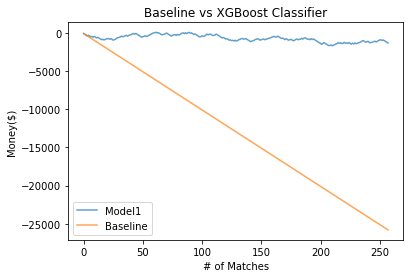

In [44]:
test_result.plot(y=["Model1", "Baseline"], alpha=0.7)
plt.title('Baseline vs XGBoost Classifier')
plt.xlabel('# of Matches')
plt.ylabel('Money($)')

plt.show()

In [45]:
test_result = test_result.drop(['Model1','Baseline'], axis=1)

In [46]:
#betting on only 55% Confidence 
money = []
count = 0 
prob = 0.55

for i,j in test_result.iterrows():
  if test_result.loc[i, 'probH'] >= prob or test_result.loc[i, 'probA'] >= prob:
    if test_result.loc[i, 'Correct'] == 1:
      if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, hi_col]))
        money.append(count)
      elif test_result.loc[i, col_result] == 0:
        count = (count + (100*test_result.loc[i, lo_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
test_result.loc[:, 'PL 0.55'] = pd.Series(money)

In [47]:
#betting on only 60% Confidence 
money = []
count = 0 
prob = 0.6

for i,j in test_result.iterrows():
  if test_result.loc[i, 'probH'] >= prob or test_result.loc[i, 'probA'] >= prob:
    if test_result.loc[i, 'Correct'] == 1:
      if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, hi_col]))
        money.append(count)
      elif test_result.loc[i, col_result] == 0:
        count = (count + (100*test_result.loc[i, lo_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
test_result.loc[:, 'PL 0.6'] = pd.Series(money)

In [48]:
#betting on only 65% Confidence 
money = []
count = 0 
prob = 0.65

for i,j in test_result.iterrows():
  if test_result.loc[i, 'probH'] >= prob or test_result.loc[i, 'probA'] >= prob:
    if test_result.loc[i, 'Correct'] == 1:
      if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, hi_col]))
        money.append(count)
      elif test_result.loc[i, col_result] == 0:
        count = (count + (100*test_result.loc[i, lo_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
test_result.loc[:, 'PL 0.65'] = pd.Series(money)

In [49]:
#betting on only 70% Confidence 
money = []
count = 0 
prob = 0.7

for i,j in test_result.iterrows():
  if test_result.loc[i, 'probH'] >= prob or test_result.loc[i, 'probA'] >= prob:
    if test_result.loc[i, 'Correct'] == 1:
      if test_result.loc[i, col_result] == 1:
        count = (count + (100*test_result.loc[i, hi_col]))
        money.append(count)
      elif test_result.loc[i, col_result] == 0:
        count = (count + (100*test_result.loc[i, lo_col]))
        money.append(count)
    else:
      count = count - 100
      money.append(count)
  else:
    money.append(count)
    
test_result.loc[:, 'PL 0.7'] = pd.Series(money)

In [50]:
# hi_prob = 0.62
# print('MATCH_DATETIME > \'%s\'' % current_match_date)
# finq = fin.query('MATCH_DATETIME > \'%s\' & prob1>=%s' % (current_match_date, hi_prob))

# finq.tail(20)
# fin.tail(10)
# finq = finq.drop(['HOME_FT_GOAL','AWAY_FT_GOAL','TOTAL_GOAL_COUNT','OU25','prob0','Correct','PL 0.55','PL 0.6','PL 0.65','PL 0.7'], axis=1)
# finq

test_result

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_A_MACAU_HDC,STR_A_MACAU_H,STR_A_MACAU_A,STR_HDA_MACAU_H,STR_HDA_MACAU_D,STR_HDA_MACAU_A,STR_A_HKJC_HDC,STR_A_HKJC_H,STR_A_HKJC_A,STR_HDA_HKJC_H,STR_HDA_HKJC_D,STR_HDA_HKJC_A,HDA_RESULT,probA,probH,pred,Correct,PL 0.55,PL 0.6,PL 0.65,PL 0.7
0,1873058,2020-09-02 18:00:00,TEST,日職乙,大宮松鼠,京都不死鳥,1.0,0.0,0.25,0.96,0.84,2.17,3.18,3.03,0.25,0.96,0.81,2.15,3.20,2.90,H,0.616186,0.383814,A,0,-100.0,-100.0,0.0,0.0
1,1908523,2020-09-02 18:00:00,TEST,日聯盃,FC東京,名古屋八鯨,3.0,0.0,0.25,1.12,0.68,2.35,3.30,2.65,None,None,None,2.33,3.30,2.55,H,0.560759,0.439241,A,0,-200.0,-100.0,0.0,0.0
2,1908522,2020-09-02 18:00:00,TEST,日聯盃,大阪櫻花,柏雷素爾,0.0,3.0,0.25,0.92,0.88,2.12,3.33,3.00,None,None,None,2.15,3.40,2.75,A,0.492867,0.507133,H,0,-200.0,-100.0,0.0,0.0
3,1873060,2020-09-02 18:00:00,TEST,日職乙,德島漩渦,水戶蜀葵,1.0,2.0,0.25,0.79,1.01,2.03,3.08,3.47,0.25,0.75,1.04,1.88,3.45,3.30,A,0.484198,0.515802,H,0,-200.0,-100.0,0.0,0.0
4,1896855,2020-09-03 07:25:00,TEST,美職業,亞特蘭大聯,國際邁阿密,0.0,0.0,0.25,0.80,1.00,2.01,3.42,3.18,0.25,0.88,0.94,2.03,3.25,3.10,A,0.614118,0.385882,A,1,-300.0,-100.0,0.0,0.0
5,1896856,2020-09-03 07:30:00,TEST,美職業,哥倫布機員,費城聯,1.0,0.0,0.25,0.78,1.02,1.98,3.38,3.28,0.75,1.2,0.68,1.80,3.50,3.55,H,0.553492,0.446508,A,0,-400.0,-200.0,0.0,0.0
6,1858644,2020-09-03 07:30:00,TEST,巴西甲,巴拉納體育會,伯拉根森,1.0,1.0,0.25,0.79,1.01,2.00,3.23,3.38,0.25,0.82,0.95,2.02,3.00,3.40,A,0.351300,0.648700,H,0,-500.0,-300.0,0.0,0.0
7,1858646,2020-09-03 08:30:00,TEST,巴西甲,彭美拉斯,國際體育會,1.0,1.0,0.25,0.94,0.86,2.20,3.00,3.15,None,None,None,2.07,2.82,3.50,A,0.621104,0.378896,A,1,-500.0,-300.0,0.0,0.0
8,1896864,2020-09-03 10:30:00,TEST,美職業,波特蘭伐木者,洛杉磯銀河,2.0,3.0,0.50,1.01,0.79,1.95,3.65,3.13,0.25,0.91,0.9,2.03,3.60,2.85,A,0.305962,0.694038,H,0,-600.0,-400.0,-100.0,0.0
9,1837333,2020-09-04 01:30:00,TEST,智利甲,柏利斯天奴,維拿迪馬愛華頓,1.0,0.0,0.25,0.78,1.02,2.07,3.23,3.18,0.25,0.76,1.02,1.95,3.25,3.30,H,0.482268,0.517732,H,1,-700.0,-400.0,-100.0,0.0


In [51]:
# final = df[['MATCH_ID','MATCH_DATETIME', 'ML_TYPE', 'LEAGUE', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_FT_GOAL', 'AWAY_FT_GOAL',
#             'STR_A_MACAU_HDC', 'STR_A_MACAU_H', 'STR_A_MACAU_A', 
#             'STR_HDA_MACAU_H', 'STR_HDA_MACAU_D', 'STR_HDA_MACAU_A',
#             'STR_A_HKJC_HDC', 'STR_A_HKJC_H', 'STR_A_HKJC_A', 
#             'STR_HDA_HKJC_H', 'STR_HDA_HKJC_D', 'STR_HDA_HKJC_A', col_result]]


# final = final.query('ML_TYPE == "PREDICT"')

# y_pred = model1.predict(X_test)
# class_probabilities = model1.predict_proba(X_test)

# pred = pd.DataFrame(y_pred, columns=['pred'])
# prob = pd.DataFrame(class_probabilities, columns=['probA','probH'])

# final.reset_index(drop=True, inplace=True)
# pred.reset_index(drop=True, inplace=True)
# prob.reset_index(drop=True, inplace=True)

# fin = pd.concat([final, prob, pred], axis=1)

# fin = fin.query('MATCH_ID.notnull() & MATCH_DATETIME>\'%s\'' % current_match_date)

# fin.sort_values('MATCH_DATETIME')
# fin.reset_index(drop=True, inplace=True)

# fin

In [52]:
predict_result = test_result.query('ML_TYPE == "PREDICT"')
predict_result

,MATCH_ID,MATCH_DATETIME,ML_TYPE,LEAGUE,HOME_TEAM,AWAY_TEAM,HOME_FT_GOAL,AWAY_FT_GOAL,STR_A_MACAU_HDC,STR_A_MACAU_H,STR_A_MACAU_A,STR_HDA_MACAU_H,STR_HDA_MACAU_D,STR_HDA_MACAU_A,STR_A_HKJC_HDC,STR_A_HKJC_H,STR_A_HKJC_A,STR_HDA_HKJC_H,STR_HDA_HKJC_D,STR_HDA_HKJC_A,HDA_RESULT,probA,probH,pred,Correct,PL 0.55,PL 0.6,PL 0.65,PL 0.7
256,1932576,2020-10-08 07:00:00,PREDICT,美職業,紐約紅牛,國際邁阿密,NaN,NaN,0.25,0.97,0.83,2.18,3.55,2.70,0.25,0.97,0.85,2.12,3.35,2.85,P,0.499393,0.500607,H,0,NaN,NaN,NaN,NaN
257,1932580,2020-10-08 08:00:00,PREDICT,美職業,侯斯頓戴拿模,FC達拉斯,NaN,NaN,0.25,0.92,0.88,2.13,3.70,2.68,0.25,0.87,0.95,2.00,3.55,2.95,P,0.642654,0.357346,A,0,NaN,NaN,NaN,NaN


In [53]:
# col_ml_type = 'LOGREG'

# # Remove previous record
# sql = 'DELETE FROM OU_PREDICT WHERE ML_TYPE=:col_ml_type AND MATCH_DATE=:db_match_date'
# c.execute(sql, [col_ml_type,db_match_date])

# data_to_insert = []
# # Insert db
# for i,j in finq.iterrows():
#     col_match_id = int(fin.loc[i, 'MATCH_ID'])
#     col_match_datetime = str(fin.loc[i, 'MATCH_DATETIME'])
#     col_league = str(fin.loc[i, 'LEAGUE'])
#     col_home_team = str(fin.loc[i, 'HOME_TEAM'])
#     col_away_team = str(fin.loc[i, 'AWAY_TEAM'])
#     col_str_ou_macau_hdc = float(fin.loc[i, 'STR_OU_MACAU_HDC'])
#     col_str_ou_macau_hi = float(fin.loc[i, 'STR_OU_MACAU_HI'])
#     col_str_ou_macau_lo = float(fin.loc[i, 'STR_OU_MACAU_LO'])
#     col_str_ou_hkjc_hdc = float(fin.loc[i, 'STR_OU_HKJC_HDC'])
#     col_str_ou_hkjc_hi = float(fin.loc[i, 'STR_OU_HKJC_HI'])
#     col_str_ou_hkjc_lo = float(fin.loc[i, 'STR_OU_HKJC_LO'])
#     col_prob1 = float(fin.loc[i, 'prob1'])
#     data_to_insert.append([col_ml_type,col_match_id,col_match_datetime,col_league,col_home_team,col_away_team,col_str_ou_macau_hdc,col_str_ou_macau_hi,col_str_ou_macau_lo,col_str_ou_hkjc_hdc,col_str_ou_hkjc_hi,col_str_ou_hkjc_lo,col_prob1,db_match_date])

# sql = 'INSERT INTO OU_PREDICT (ML_TYPE,MATCH_ID,MATCH_DATETIME,LEAGUE,HOME_TEAM,AWAY_TEAM,STR_OU_MACAU_HDC,STR_OU_MACAU_HI,STR_OU_MACAU_LO,STR_OU_HKJC_HDC,STR_OU_HKJC_HI,STR_OU_HKJC_LO,HI_PROB,MATCH_DATE) VALUES (:col_ml_type,:col_match_id,TO_DATE(:col_match_datetime,\'YYYY-MM-DD HH24:MI:SS\'),:col_league,:col_home_team,:col_away_team,:col_str_ou_macau_hdc,:col_str_ou_macau_hi,:col_str_ou_macau_lo,:col_str_ou_hkjc_hdc,:col_str_ou_hkjc_hi,:col_str_ou_hkjc_lo,:col_prob1,:db_match_date)'
# c.executemany(sql, data_to_insert)
# connection.commit()

In [54]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_distributions = {
    'randomforestclassifier__n_estimators':[20,50,100,200],
    'randomforestclassifier__criterion':['gini', 'entropy'],
    'randomforestclassifier__max_features':[0.25,3,5],
    'randomforestclassifier__min_samples_split':[3,5,15],
    'randomforestclassifier__min_samples_leaf':[2,5],
}

# If you're on Colab, decrease n_iter & cv parameters
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


OSError: [Errno 22] Invalid argument

In [ ]:
print('Cross-validation Best Score:', search.best_score_)
print('Best Estimator:', search.best_params_)
print('Best Model:', search.best_estimator_)